In [ ]:
pip install nltk
pip install langdetect
pip install spacy
pip install textblob
pip install describe
pip install numpy
pip install gensim
pip install wordcloud

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import numpy as np

from textblob import TextBlob
from wordcloud import WordCloud
from langdetect import detect
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from string import punctuation
from collections import Counter
from nltk.corpus import words as english_words

In [ ]:
# Download NLTK resources

# Download the stopwords data
nltk.download('stopwords')
# Download the punkt tokenizer data
nltk.download('punkt')
nltk.download('stopwords')

In [2]:
# Load the male and female data
male_data = pd.read_excel('/male_data.xlsx', engine='openpyxl')
female_data = pd.read_excel('/female_data.xlsx', engine='openpyxl')

# Before Processing 

In [ ]:
male_data_orj.head()

In [ ]:
female_data_orj.head(3)

In [ ]:
male_data_orj.columns

In [ ]:
female_data_orj.columns

In [ ]:
male_data_orj.describe()

In [ ]:
female_data_orj.describe()

# After data Preprocessing¶

In [ ]:
# Drop columns with all NaN values
male_data_orj = male_data_orj.dropna(axis=1, how='all')
female_data_orj = female_data_orj.dropna(axis=1, how='all')

In [ ]:
total_rows_maledata_orj = len(male_data_orj)
distinct_rows_maledata_orj = male_data_orj.nunique()

# Count of all rows in male_data and female_data
print(f"Total Rows for Male Data: {total_rows_maledata_orj}")

# Count of distinct rows in male_data
print("Distinct Count for Each Column for Male Data:")
print(distinct_rows_maledata_orj)

In [ ]:
total_rows_femaledata_orj = len(female_data_orj)
distinct_rows_femaledata_orj = female_data_orj.nunique()

# Count of all rows in male_data and female_data
print(f"Total Rows for Female Data: {total_rows_femaledata_orj}")

# Count of distinct rows in male_data
print("Distinct Count for Each Column for Female Data:")
print(distinct_rows_femaledata_orj)

In [ ]:
# Step 2b: Remove unusual comments or posts (empty comments or comments with only symbols)
male_data_orj = male_data_orj[male_data_orj['comment_text'].str.strip() != '']  # Remove empty comments

In [ ]:
female_data_orj = female_data_orj[female_data_orj['comment_text'].str.strip() != '']  # Remove empty comments

In [ ]:
#Converting the data into string format 
male_data_orj['comment_text'] = male_data_orj['comment_text'].astype(str)
female_data_orj['comment_text'] = female_data_orj['comment_text'].astype(str)

In [ ]:
# Step 2c: Remove unusual characters from comment_text using regex
male_data_orj['comment_text'] = male_data_orj['comment_text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
female_data_orj['comment_text'] = female_data_orj['comment_text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

In [ ]:
# Define a function to filter out non-English and non-alphabetic words
def clean_text(text):
    # Define a set of English words
    english_word_set = set(english_words.words())

    # Split the text into words
    words = text.split()

    # Filter out non-English words and non-alphabetic characters
    clean_words = [word for word in words if word.lower() in english_word_set and word.isalpha()]

    # Join the clean words back into a clean text
    clean_text = " ".join(clean_words)

    return clean_text

In [ ]:
# Apply the function to the 'comment_text' column
male_data_orj['male_cleaned_comment_text'] = male_data_orj['comment_text'].apply(clean_text)

In [ ]:
female_data_orj['female_cleaned_comment_text'] = female_data_orj['comment_text'].apply(clean_text)

In [ ]:
print(male_data_orj.columns)

In [ ]:
print(female_data_orj.columns)

In [ ]:
# Display the cleaned comments
print("Male Data Cleaned Comments:")
print(male_data_orj[['comment_text', 'male_cleaned_comment_text']].head())

In [ ]:
# Display the cleaned comments
print("Female Data Cleaned Comments:")
print(female_data_orj[['comment_text', 'female_cleaned_comment_text']].head())

In [ ]:
# Remove unusual comments or posts (empty comments or comments with only symbols)
male_data_orj['male_cleaned_comment_text_unusual_symbols'] = male_data_orj['male_cleaned_comment_text'].apply(lambda x: re.sub(r"[^\w\s]", "", str(x)))


In [ ]:
# Remove unusual comments or posts (empty comments or comments with only symbols)
female_data_orj['female_cleaned_comment_text_unusual_symbols'] = female_data_orj['female_cleaned_comment_text'].apply(lambda x: re.sub(r"[^\w\s]", "", str(x)))


In [ ]:
# Function to remove URLs from text data
def remove_urls(text):
    # Define a regular expression pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'
    without_urls = re.sub(url_pattern, '', text)
    return without_urls


In [ ]:
print(male_data_orj['male_cleaned_comment_text_unusual_symbols'])

In [ ]:
# Apply the function to the specific column in the DataFrame
male_data_orj['male_cleaned_comment_text_removed_urls'] = male_data_orj['male_cleaned_comment_text_unusual_symbols'].apply(remove_urls)

print(male_data_orj['male_cleaned_comment_text_removed_urls'])

In [ ]:
# Apply the function to the specific column in the DataFrame
female_data_orj['female_cleaned_comment_text_removed_urls'] = female_data_orj['female_cleaned_comment_text_unusual_symbols'].apply(remove_urls)

print(female_data_orj['female_cleaned_comment_text_removed_urls'])

In [ ]:

male_data_orj.drop_duplicates(inplace=True)

In [ ]:
female_data_orj.drop_duplicates(inplace=True)

In [ ]:
from nltk.tokenize import word_tokenize
import numpy as np

# Tokenize comments and calculate comment lengths
male_data_orj['comment_length'] = male_data_orj['comment_text'].apply(lambda x: len(word_tokenize(str(x))))
female_data_orj['comment_length'] = female_data_orj['comment_text'].apply(lambda x: len(word_tokenize(str(x))))

# Calculate average comment length
avg_comment_length_male = np.mean(male_data_orj['comment_length'])
avg_comment_length_female = np.mean(female_data_orj['comment_length'])

# Print results
print(f"Number of comments (Male): {len(male_data_orj)}")
print(f"Average comment length (Male): {avg_comment_length_male:.2f} words")

print(f"Number of comments (Female): {len(female_data_orj)}")
print(f"Average comment length (Female): {avg_comment_length_female:.2f} words")

In [ ]:
# Tokenize comments and calculate comment lengths
male_data_orj['cleaned_comment_length'] = male_data_orj['male_cleaned_comment_text_removed_urls'].apply(lambda x: len(word_tokenize(str(x))))
female_data_orj['cleaned_comment_length'] = female_data_orj['female_cleaned_comment_text_removed_urls'].apply(lambda x: len(word_tokenize(str(x))))

# Calculate average comment length
avg_comment_length_cleaned_male = np.mean(male_data_orj['cleaned_comment_length'])
avg_comment_length_cleaned_female = np.mean(female_data_orj['cleaned_comment_length'])

# Print results
print(f"Number of comments (Cleaned_Male): {len(male_data_orj)}")
print(f"Average comment length (Cleaned_Male): {avg_comment_length_cleaned_male:.2f} words")

print(f"Number of comments (Cleaned_Female): {len(female_data_orj)}")
print(f"Average comment length (Cleaned_Female): {avg_comment_length_cleaned_female:.2f} words")

In [ ]:
# Function to remove stop words using spaCy
def remove_stop_words(string):
    # Check if the value is NaN or a boolean (True/False)
    if pd.isna(string) or isinstance(string, bool):
        return ''

    # Tokenize the string into individual words
    doc = nlp(string)

    # Filter out stop words
    filtered_words = [token.text for token in doc if not token.is_stop]

    # Join the filtered words back into a string
    new_string = ' '.join(filtered_words)

    return new_string

In [ ]:
male_data_orj['stop_words_removed'] = male_data_orj['cleaned_comment_length'].apply(remove_stop_words)

# Display the original and filtered comments for the first few rows in the random samples
print("stop_words_removed:")

In [ ]:
female_data_orj['stop_words_removed'] = female_data_orj['cleaned_comment_length'].apply(remove_stop_words)

# Display the original and filtered comments for the first few rows in the random samples
print("stop_words_removed:")

In [ ]:
from nltk.tokenize import word_tokenize
import numpy as np

# Tokenize comments and calculate comment lengths
male_data_orj['comment_length'] = male_data_orj['stop_words_removed'].apply(lambda x: len(word_tokenize(str(x))))
female_data_orj['comment_length'] = female_data_orj['stop_words_removed'].apply(lambda x: len(word_tokenize(str(x))))
# Calculate average comment length
avg_comment_length_male = np.mean(male_data_orj['comment_length'])
avg_comment_length_female = np.mean(female_data_orj['comment_length'])
# Print results
print(f"Number of comments (Male): {len(female_data_orj)}")
print(f"Average comment length (Male): {avg_comment_length_female:.2f} words")

print(f"Number of comments (Male): {len(male_data_orj)}")
print(f"Average comment length (Male): {avg_comment_length_female:.2f} words")

In [ ]:
# Combine comments into a single text
combined_text_male_data = ' '.join(male_data['comment_text'])
combined_text_female_data = ' '.join(female_data['comment_text'])

In [ ]:
# Basic statistics
num_comments_male = len(male_data)
avg_comment_length_male = male_data['comment_text'].str.split().apply(len).mean()
avg_comment_length_male = male_data['stop_words_removed'].str.split().apply(len).mean()

num_comments_female = len(female_data)
avg_comment_length_female = female_data['comment_text'].str.split().apply(len).mean()
avg_comment_length_female = female_data['stop_words_removed'].str.split().apply(len).mean()

In [ ]:
print(f"Number of comments: {num_comments_male}")
print(f"Average comment length: {avg_comment_length_male:.2f} words")

In [ ]:
print(f"Number of comments: {num_comments_female}")
print(f"Average comment length: {avg_comment_length_female:.2f} words")

In [10]:
male_data_after = pd.read_excel('/LAST/male_dataset.xlsx', engine='openpyxl')
female_data_after = pd.read_excel('LAST/female_dataset.xlsx', engine='openpyxl')  

In [8]:
# Summary statistics
print("Summary Statistics for Male Politicians dataset orjinal:")
print(orjinal_male_data.describe())
print("\nSummary Statistics for Female Politicians dataset orjinal:")
print(orjinal_female_data.describe())

Summary Statistics for Male Politicians dataset orjinal:
              shares          likes          loves            wow  \
count  594954.000000  594954.000000  594954.000000  594954.000000   
mean      558.279654    3858.591347     590.467587       1.602292   
std       916.481201    5639.283923    1144.292875      17.125047   
min         0.000000       0.000000       0.000000       0.000000   
25%        54.000000     731.000000       0.000000       0.000000   
50%       265.000000    2000.000000     168.000000       0.000000   
75%       628.000000    4600.000000     590.000000       0.000000   
max      7800.000000   45000.000000    9800.000000     309.000000   

               cares            sad          angry           haha  \
count  594954.000000  594954.000000  594954.000000  594954.000000   
mean       32.934087      57.649156     107.852498     268.423828   
std       235.831495     363.386043     359.791317     698.995122   
min         0.000000       0.000000       0.0

Summary Statistics for Male Politicians:
              shares          likes          loves            wow  \
count  551424.000000  551424.000000  551424.000000  551424.000000   
mean      563.224054    3884.414106     592.507680       1.640348   
std       923.900531    5661.144875    1145.508089      17.341464   
min         0.000000       0.000000       0.000000       0.000000   
25%        56.000000     737.000000       0.000000       0.000000   
50%       270.000000    2000.000000     168.000000       0.000000   
75%       628.000000    4800.000000     592.000000       0.000000   
max      7800.000000   45000.000000    9800.000000     309.000000   

               cares            sad          angry           haha  \
count  551424.000000  551424.000000  551424.000000  551424.000000   
mean       28.503449      52.309921     109.170105     267.148427   
std       215.498927     337.632836     360.730063     696.270590   
min         0.000000       0.000000       0.000000       0.00

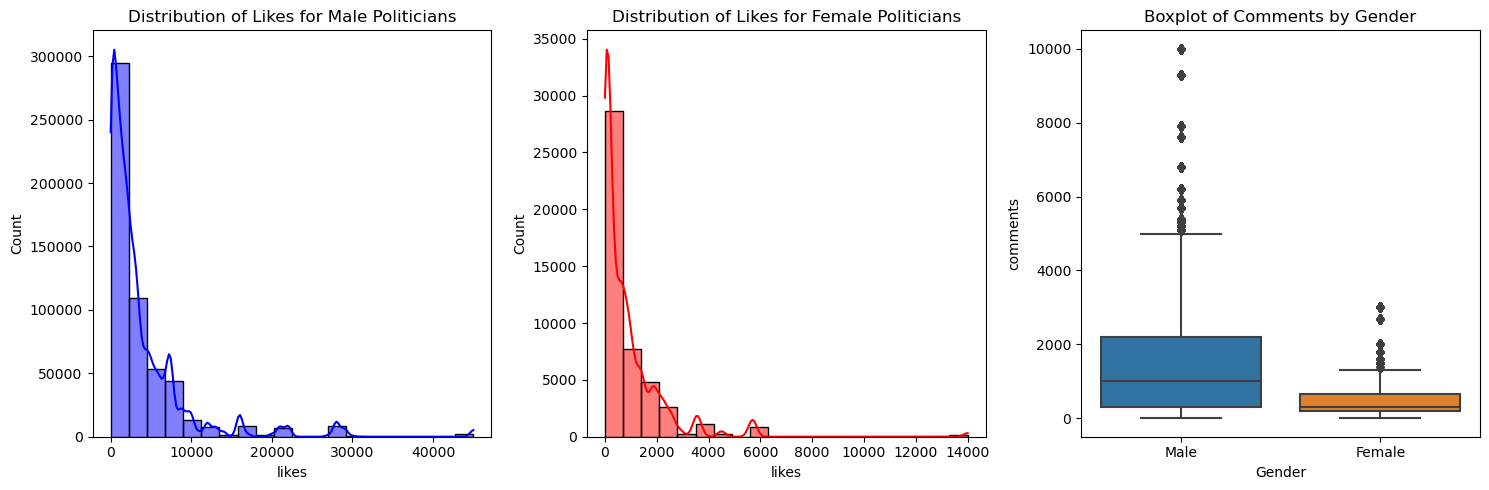

In [20]:
# Summary statistics
print("Summary Statistics for Male Politicians:")
print(male_data.describe())
print("\nSummary Statistics for Female Politicians:")
print(female_data.describe())

# Distribution of engagement metrics (likes, shares, comments)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(male_data['likes'], bins=20, color='blue', kde=True)
plt.title('Distribution of Likes for Male Politicians')

plt.subplot(1, 3, 2)
sns.histplot(female_data['likes'], bins=20, color='red', kde=True)
plt.title('Distribution of Likes for Female Politicians')

plt.subplot(1, 3, 3)
sns.boxplot(x='Gender', y='comments', data=pd.concat([male_data, female_data]))
plt.title('Boxplot of Comments by Gender')

plt.tight_layout()
plt.show()

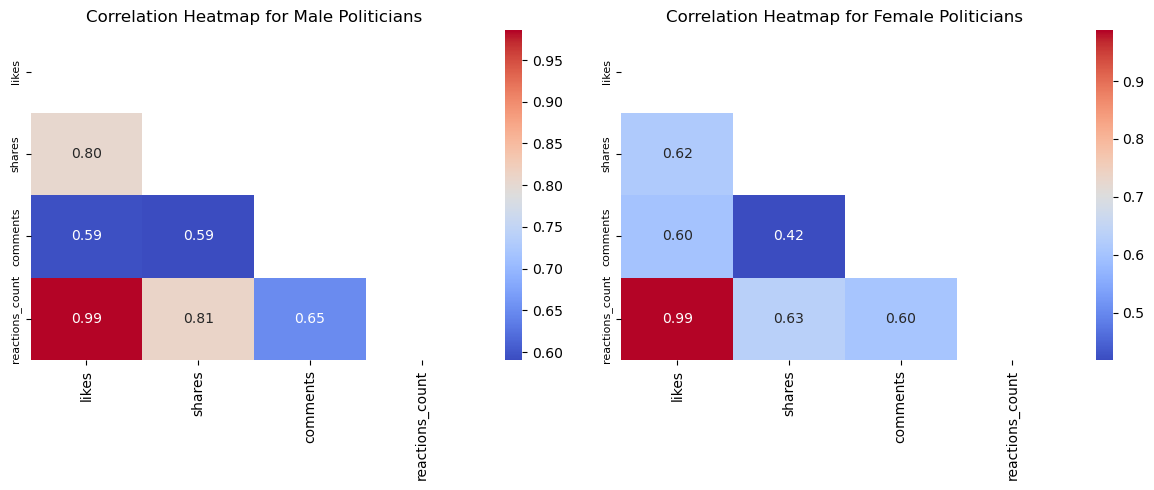

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation between engagement metrics
engagement_metrics = ['likes', 'shares', 'comments', 'reactions_count']
correlation_male = male_data[engagement_metrics].corr()
correlation_female = female_data[engagement_metrics].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_male, dtype=bool))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_male, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Male Politicians')

plt.yticks(fontsize=8)  # Reduce text size for y-axis labels

plt.subplot(1, 2, 2)
sns.heatmap(correlation_female, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Female Politicians')

plt.yticks(fontsize=8)  # Reduce text size for y-axis labels

plt.tight_layout()
plt.show()


In [25]:
# Check if 'posted_on' column is in datetime format and convert if not
if not pd.api.types.is_datetime64_any_dtype(female_data['posted_on']):
    female_data['posted_on'] = pd.to_datetime(female_data['posted_on'])

# Check year distribution for 'posted_on' column in female dataset
female_data['posted_on_year'] = female_data['posted_on'].dt.year
female_year_distribution = female_data['posted_on_year'].value_counts().sort_index()

print("Female Dataset Year Distribution:")
print(female_year_distribution)


Female Dataset Year Distribution:
2021    10978
2022       17
2023    35540
Name: posted_on_year, dtype: int64


In [26]:
# Check if 'posted_on' column is in datetime format and convert if not
if not pd.api.types.is_datetime64_any_dtype(male_data['posted_on']):
    male_data['posted_on'] = pd.to_datetime(male_data['posted_on'])

# Check year distribution for 'posted_on' column in female dataset
male_data['posted_on_year'] = male_data['posted_on'].dt.year
male_year_distribution = male_data['posted_on_year'].value_counts().sort_index()

print("Male Dataset Year Distribution:")
print(male_year_distribution)

Male Dataset Year Distribution:
2013       710
2014      1620
2015      6103
2016      2450
2017      3167
2018       633
2019      4933
2020     57843
2021    236956
2022     62039
2023    174970
Name: posted_on_year, dtype: int64


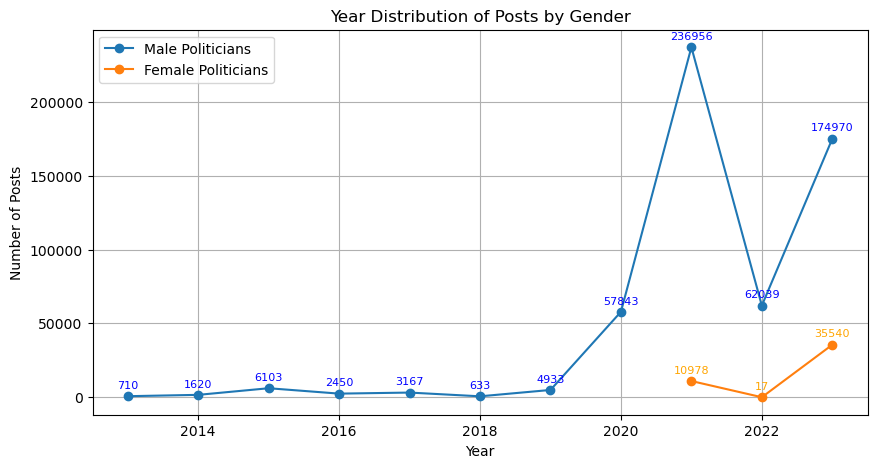

In [33]:
# Plot year distribution for male and female datasets separately
plt.figure(figsize=(10, 5))

plt.plot(male_year_distribution.index, male_year_distribution.values, label='Male Politicians', marker='o')
plt.plot(female_year_distribution.index, female_year_distribution.values, label='Female Politicians', marker='o')

plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.title('Year Distribution of Posts by Gender')

plt.legend()
plt.grid(True)

# Annotate data points with labels
for year, count in male_year_distribution.items():
    plt.text(year, count + 4000, str(count), ha='center', va='bottom', fontsize=8, color='blue')  # Adjust the y-coordinate (count + 1000)
for year, count in female_year_distribution.items():
    plt.text(year, count + 4000, str(count), ha='center', va='bottom', fontsize=8, color='orange')  # Adjust the y-coordinate (count + 1000)

plt.show()


In [29]:
# Align year distributions
male_year_distribution_aligned = male_year_distribution.reindex(female_year_distribution.index, fill_value=0)

# Create a table to display numerical values
year_distribution_table = pd.DataFrame({'Year': female_year_distribution.index,
                                        'Male Posts': male_year_distribution_aligned.values,
                                        'Female Posts': female_year_distribution.values})

display(year_distribution_table)


,Year,Male Posts,Female Posts
0,2021,236956,10978
1,2022,62039,17
2,2023,174970,35540


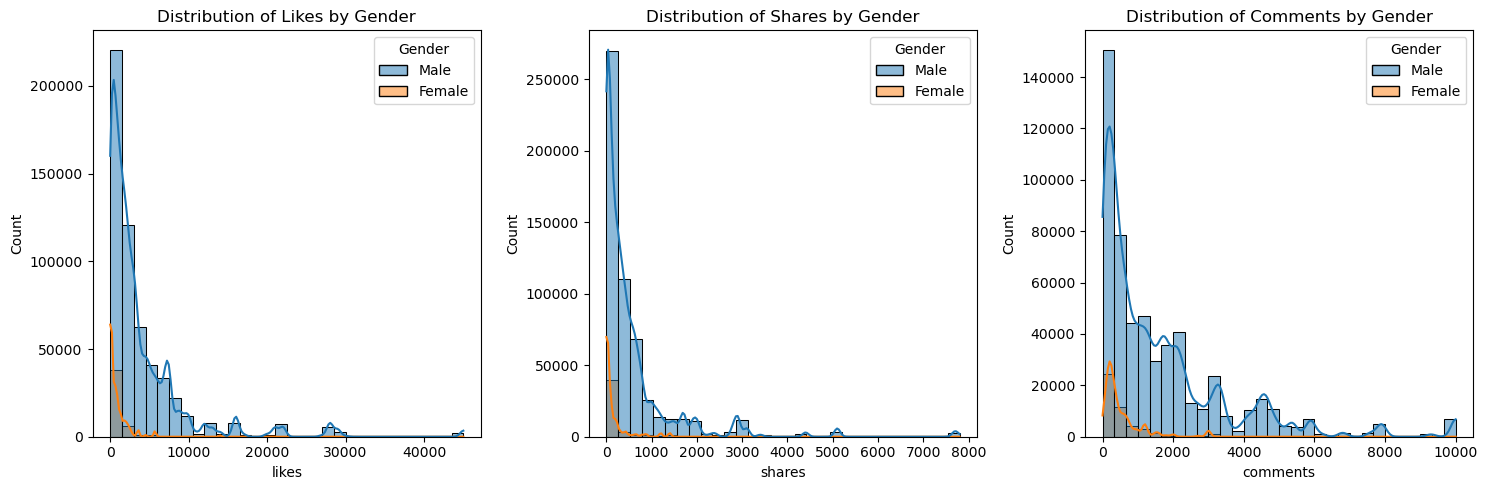

In [6]:
# Combine male and female data for analysis
combined_data = pd.concat([male_data, female_data])

# Reset index to resolve duplicate index labels
combined_data = combined_data.reset_index(drop=True)

# Distribution of engagement metrics (likes, shares, comments)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=combined_data, x='likes', hue='Gender', bins=30, kde=True)
plt.title('Distribution of Likes by Gender')

plt.subplot(1, 3, 2)
sns.histplot(data=combined_data, x='shares', hue='Gender', bins=30, kde=True)
plt.title('Distribution of Shares by Gender')

plt.subplot(1, 3, 3)
sns.histplot(data=combined_data, x='comments', hue='Gender', bins=30, kde=True)
plt.title('Distribution of Comments by Gender')

plt.tight_layout()
plt.show()




In [11]:
# 1. Gender Distribution
male_gender_distribution = male_data['Gender'].value_counts()
female_gender_distribution = female_data['Gender'].value_counts()
print("Male Gender Distribution:\n", male_gender_distribution)
print("Female Gender Distribution:\n", female_gender_distribution)


Male Gender Distribution:
 Male    551424
Name: Gender, dtype: int64
Female Gender Distribution:
 Female    46535
Name: Gender, dtype: int64


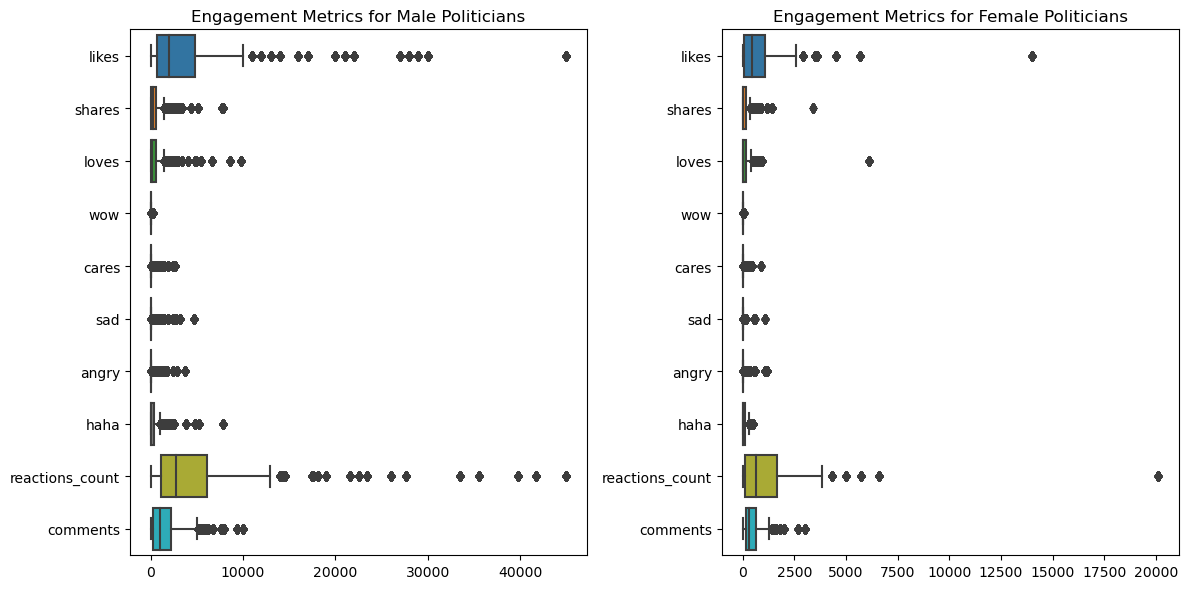

In [13]:
# 2. Engagement Metrics
engagement_metrics = ['likes', 'shares', 'loves', 'wow', 'cares', 'sad', 'angry', 'haha', 'reactions_count', 'comments']

# Male Dataset
male_engagement_data = male_data[engagement_metrics]
male_engagement_stats = male_engagement_data.describe()

# Female Dataset
female_engagement_data = female_data[engagement_metrics]
female_engagement_stats = female_engagement_data.describe()

# Plotting
plt.figure(figsize=(12, 6))

# Male Dataset
plt.subplot(1, 2, 1)
sns.boxplot(data=male_engagement_data, orient='h')
plt.title('Engagement Metrics for Male Politicians')

# Female Dataset
plt.subplot(1, 2, 2)
sns.boxplot(data=female_engagement_data, orient='h')
plt.title('Engagement Metrics for Female Politicians')

plt.tight_layout()
plt.show()


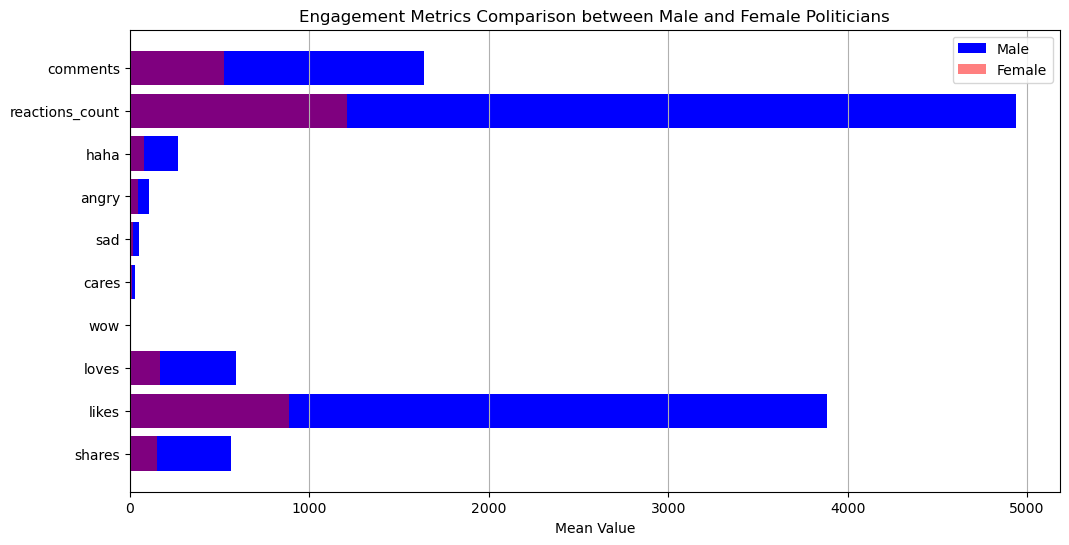

In [14]:
import matplotlib.pyplot as plt

# Engagement metrics
engagement_metrics = ['shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry', 'haha', 'reactions_count', 'comments']

# Male engagement metrics
male_means = [563.22, 3884.41, 592.51, 1.64, 28.50, 52.31, 109.17, 267.15, 4935.69, 1640.10]

# Female engagement metrics
female_means = [153.86, 884.18, 168.81, 0.30, 9.63, 16.83, 47.70, 81.07, 1208.52, 523.57]

# Plotting
plt.figure(figsize=(12, 6))

plt.barh(engagement_metrics, male_means, color='blue', label='Male')
plt.barh(engagement_metrics, female_means, color='red', alpha=0.5, label='Female')

plt.xlabel('Mean Value')
plt.title('Engagement Metrics Comparison between Male and Female Politicians')
plt.legend()
plt.grid(axis='x')

plt.show()


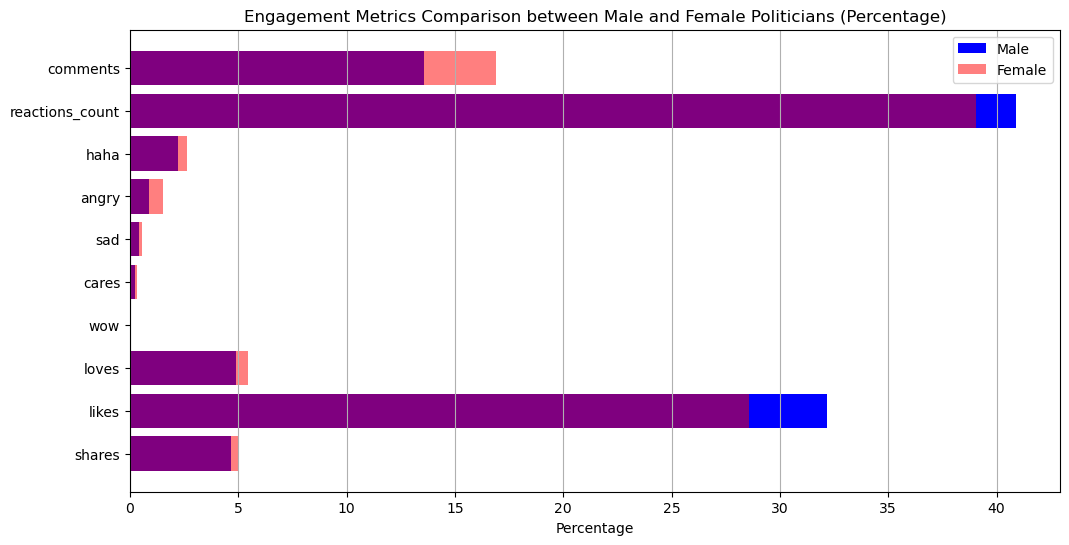

In [15]:
import matplotlib.pyplot as plt

# Engagement metrics
engagement_metrics = ['shares', 'likes', 'loves', 'wow', 'cares', 'sad', 'angry', 'haha', 'reactions_count', 'comments']

# Male engagement metrics
male_means = [563.22, 3884.41, 592.51, 1.64, 28.50, 52.31, 109.17, 267.15, 4935.69, 1640.10]

# Female engagement metrics
female_means = [153.86, 884.18, 168.81, 0.30, 9.63, 16.83, 47.70, 81.07, 1208.52, 523.57]

# Calculate total engagement for both male and female
total_male_engagement = sum(male_means)
total_female_engagement = sum(female_means)

# Calculate percentages
male_percentages = [100 * (mean / total_male_engagement) for mean in male_means]
female_percentages = [100 * (mean / total_female_engagement) for mean in female_means]

# Plotting
plt.figure(figsize=(12, 6))

plt.barh(engagement_metrics, male_percentages, color='blue', label='Male')
plt.barh(engagement_metrics, female_percentages, color='red', alpha=0.5, label='Female')

plt.xlabel('Percentage')
plt.title('Engagement Metrics Comparison between Male and Female Politicians (Percentage)')
plt.legend()
plt.grid(axis='x')

plt.show()


In [17]:
# 3. Time Analysis
# You can perform time analysis separately for male and female datasets
# Importing necessary libraries
from textblob import TextBlob

# 4. Toxicity Analysis (Sentiment Analysis using TextBlob)
def textblob_sentiment(text):
    if isinstance(text, str):
        analysis = TextBlob(text)
        return analysis.sentiment.polarity
    else:
        return 0  # Return 0 for non-string values

# Male Dataset
male_data['comment_sentiment'] = male_data['comment_text'].apply(textblob_sentiment)

# Female Dataset
female_data['comment_sentiment'] = female_data['comment_text'].apply(textblob_sentiment)


In [21]:
from wordcloud import WordCloud

def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

# Now you can use this function to generate word clouds


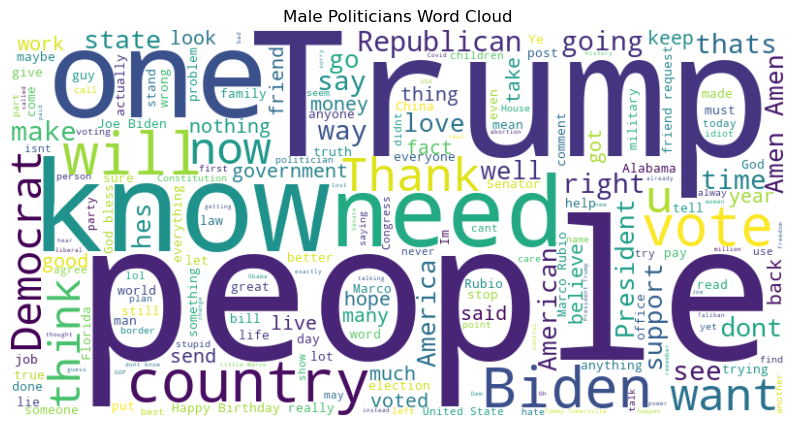

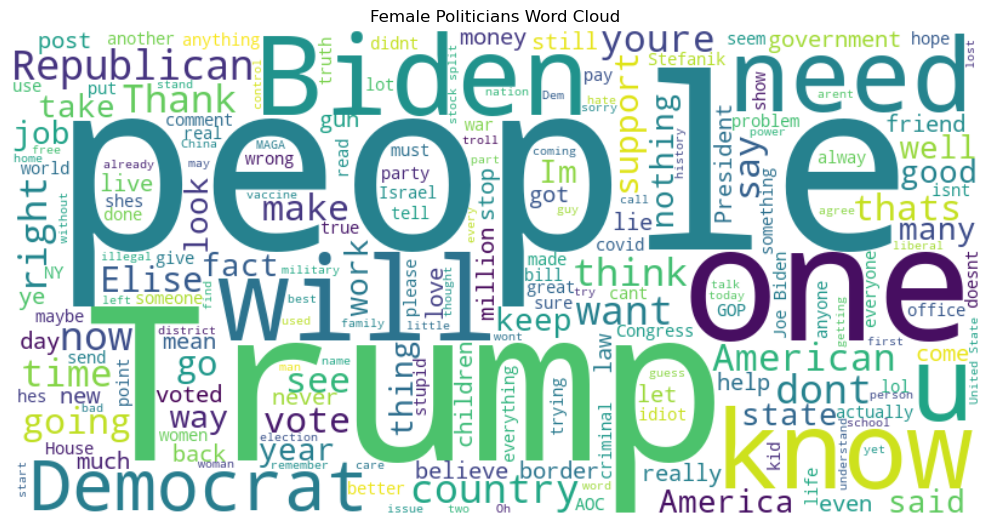

In [22]:
# 5. Word Cloud Visualization
# You can generate word clouds separately for male and female datasets

# Male Dataset
male_comments = " ".join(male_data['comment_text'].astype(str))  # Convert to string
plt.figure(figsize=(10, 6))
generate_wordcloud(male_comments)
plt.title('Male Politicians Word Cloud')

# Female Dataset
female_comments = " ".join(female_data['comment_text'].astype(str))  # Convert to string
plt.figure(figsize=(10, 6))
generate_wordcloud(female_comments)
plt.title('Female Politicians Word Cloud')

plt.tight_layout()
plt.show()


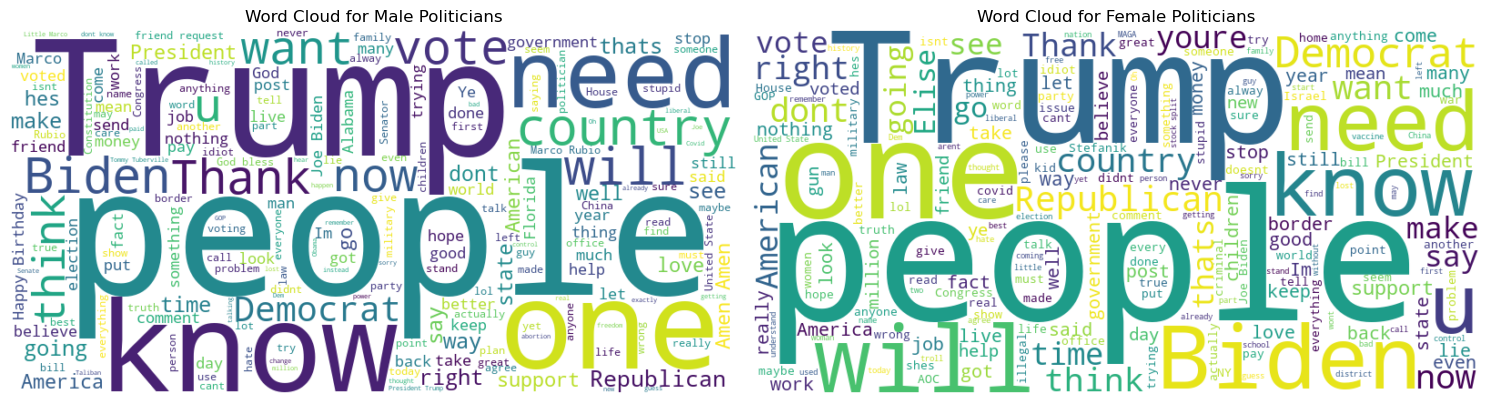

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for male and female datasets
male_comments = " ".join(male_data['comment_text'].astype(str))  # Convert to string
female_comments = " ".join(female_data['comment_text'].astype(str))  # Convert to string

# Generate word cloud for male dataset
wordcloud_male = WordCloud(width=800, height=400, background_color='white').generate(male_comments)

# Generate word cloud for female dataset
wordcloud_female = WordCloud(width=800, height=400, background_color='white').generate(female_comments)

# Plot the word clouds
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_male, interpolation='bilinear')
plt.title('Word Cloud for Male Politicians')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_female, interpolation='bilinear')
plt.title('Word Cloud for Female Politicians')
plt.axis('off')

plt.tight_layout()
plt.show()
